### Анализ датасета с фильмами
[cсылка на код](https://github.com/tolya231/movie)

Киноиндустрия развивается гигантскими темпами, в нее вкладываются все больше денег. Но только ли бюджет влияют на размер выручки? Может есть какие-то другие факторы, не требующие вложений? Например страна производства, или язык на котором говорят в фильме. Или лучше создавать в фильмы в каком-то определенном жанре. 
Рецепт успешного фильма хотят узнать многие, найти его мне поможет следующий датасет о фильмах.

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

In [82]:
df = pd.read_csv('movies.csv', encoding = 'latin1')
df.drop(columns = ['homepage', 'id', 'overview', 'spoken_languages', 'tagline', 'title'], axis = 1, inplace = True)
df.dropna(inplace=True);

Колонки в таблице следующие:
* budget - бюджет фильма
* genres - жанры
* homepage - домашняя страница
* id - id
* keywords - клбчевые слова
* original_language - оригинальный язык фильма
* original_title - название
* overview - краткое описание
* popularity - популярность
* production_companies - компания, создавшая фильм
* production_countries - страна создания
* release_date - дата выхода
* revenue - выручка
* runtime - длительность
* spoken_languages - языки на которых говорят в фильме
* status - текущий статус (выпущен / не выпущен)
* tagline - тэги
* title - название фильма (после различных переводов)
* vote_average - рейтинг 
* vote_count - число проголосовавших

##### Что можно сказать об успехе фильма, т.е. какую прибыль он принесет компании?

Этим предсказанием я и займусь.

In [83]:
# Для начала обработаем данные и переведем их в в удобный формат

#колонка genres -> список жанров
df['genres'] = df['genres'].apply(json.loads)
for index, i in zip(df.index, df['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df.loc[index, 'genres'] = str(list1)
df['genres'] = df['genres'].str.replace("'",'')
    
#колонка keywords -> список ключевых слов
df['keywords']=df['keywords'].apply(json.loads)
for index, i in zip(df.index, df['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df.loc[index, 'keywords'] = str(list1)
df['keywords'] = df['keywords'].str.replace("'",'')
 
#колонка production_companies -> название компании
df['production_companies']=df['production_companies'].apply(json.loads)
for index, i in zip(df.index, df['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df.loc[index, 'production_companies'] = str(list1)
df['production_companies'] = df['production_companies'].str.replace("'",'')

#колонка production_countries  -> название страны производства

df['production_countries'] = df['production_countries'].apply(json.loads)
for index, i in zip(df.index, df['production_countries']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df.loc[index,'production_countries'] = str(list1)
df['production_countries'] = df['production_countries'].str.replace("'",'')

df['budget'] = df['budget'] / 1000000 # в миллионах
df = df[df['status'] == 'Released'] #будем делать предсказания только с помощью фильмов, которые вышли

import dateparser
df['release_date'] = df['release_date'].apply(dateparser.parse).apply(lambda x: x.year) #оставляем только год
df['revenue'] = df['revenue'] / 1000000

In [84]:
df.head(5)

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count
0,237.0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009,2787.965087,162.0,Released,7.2,11800
1,300.0,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007,961.000000,169.0,Released,6.9,4500
2,245.0,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",en,Spectre,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015,880.674609,148.0,Released,6.3,4466
3,250.0,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012,1084.939099,165.0,Released,7.6,9106
4,260.0,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,John Carter,43.926995,[Walt Disney Pictures],[United States of America],2012,284.139100,132.0,Released,6.1,2124


82.4492916759182


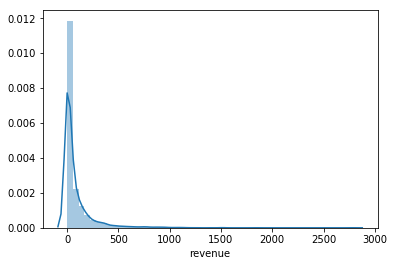

In [85]:
# Теперь построим на данные с помощью графиков
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#для начала посмотрим как распределена выручка и посчитаем среднее значение в относительных единицах (реальная / 1000000)
print(df['revenue'].mean())
sns.distplot(df['revenue'])

c:\users\mr_to\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


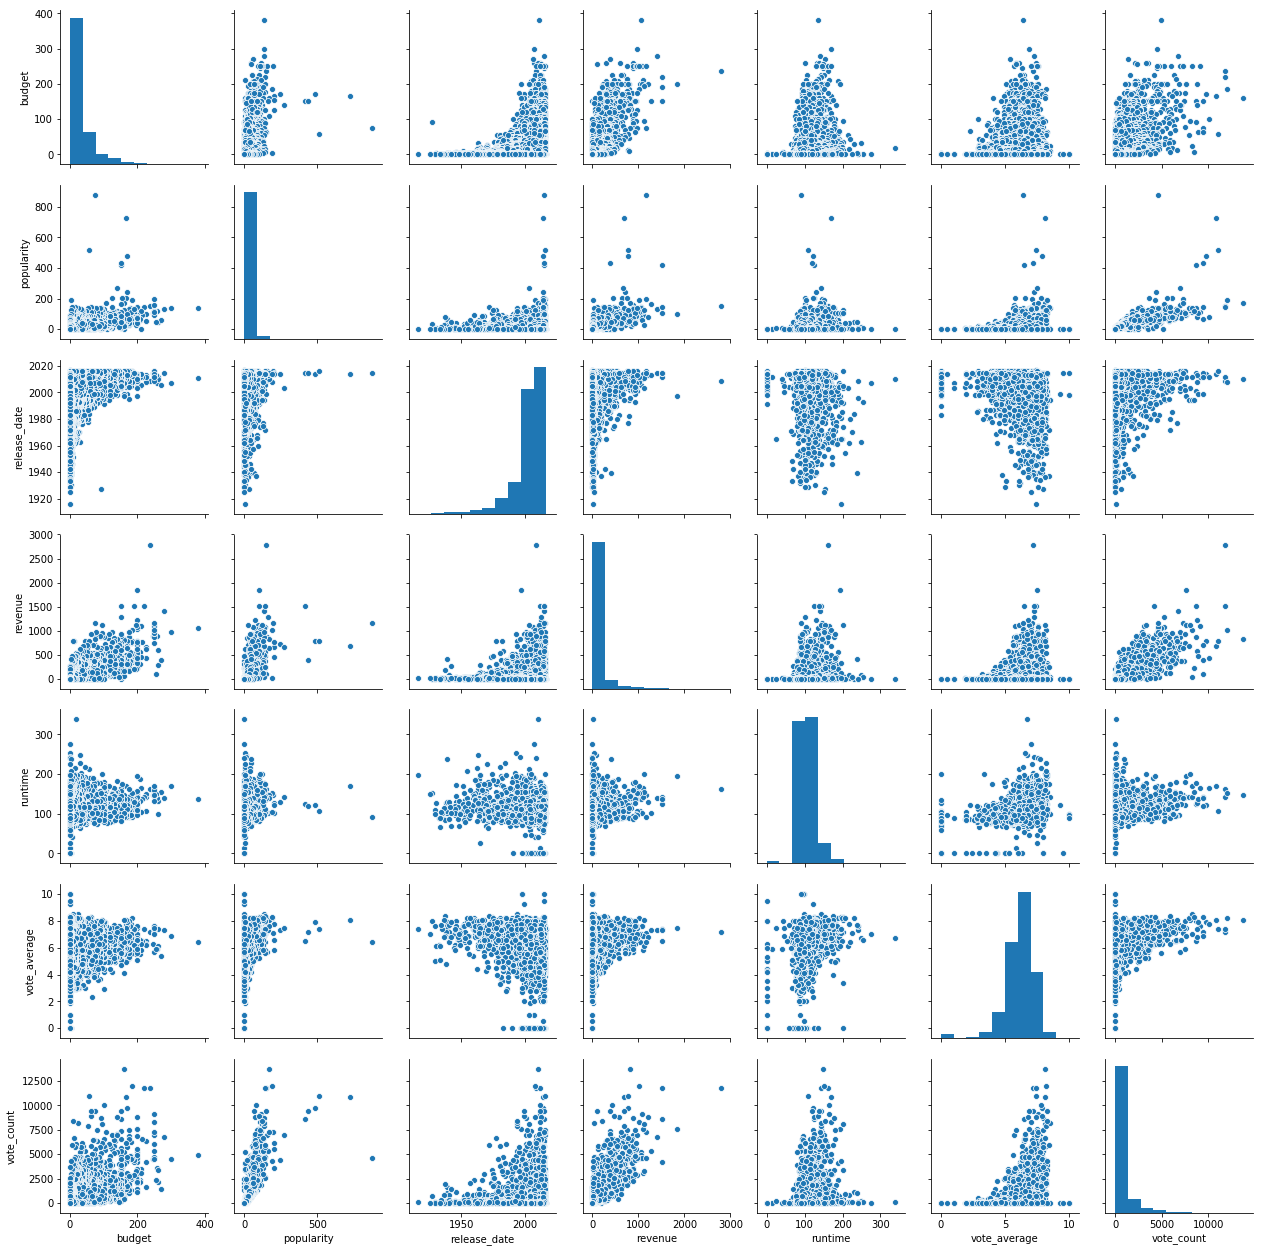

In [86]:
# Посмотрим как распределены переменные друг относительно друга
sns.pairplot(df, size=2.5)

Отсюда видно, что прослеживаются некоторые зависимости между переменными. Например, более или менее линейную зависимость имеют переменные: budget - revenue, vote_count - revenue. Какие-то переменные совершенно не зависят друг от друга, например release_date и runtime

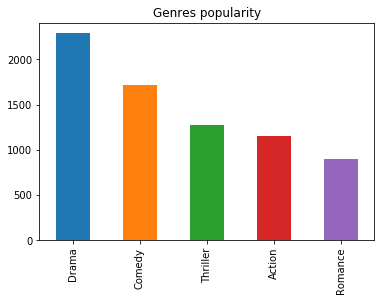

In [87]:
#Распределение фильмов по жанрам (топ 5)
from collections import Counter
genres = []
for genre in df['genres']:
    genreList = genre[1:-1].split(',')
    genres += genreList
genres = list(filter(len, genres))
genres = list(map(lambda x: x.strip(), genres))
# Counter(genres).most_common(5)
pd.Series(genres).value_counts().head(5).plot(kind='bar', title='Genres popularity')

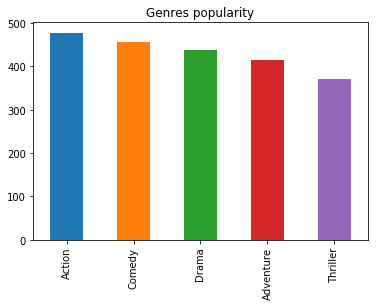

In [88]:
#А теперь для хороших фильмов (хорошими будем считать фильмы с вырочкой >= среднего значение)
df_copy = df[df['revenue'] >  df['revenue'].mean()]
genres = []
for genre in df_copy['genres']:
    genreList = genre[1:-1].split(',')
    genres += genreList
genres = list(filter(len, genres))
genres = list(map(lambda x: x.strip(), genres))
# Counter(genres).most_common(5)
pd.Series(genres).value_counts().head(5).plot(kind='bar', title='Genres popularity')

В целом получилось, что примерно те же жанры входят в топ 5 для "хороших" фильмов, будем считать что они мало влияют на успех фильма. (Тем более что в каждом фильме несколько жанров)

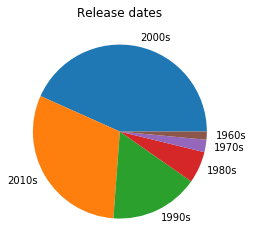

In [89]:
# Число вышедших фильмов по декадам (топ 6)
import itertools
decades = []
years = df['release_date'].values
itertools.groupby(years, key= lambda x : str(x)[:3])
for year in years:
        decade = int(np.floor(year / 10) * 10)
        decades.append(decade)
decades = list(map(lambda x: str(x) + "s", decades))
pd.Series(decades).value_counts().head(6).plot(kind='pie', title='Release dates')
plt.ylabel('');

Число выпускаемых фильмов сильно растет, далее проверим может со временем выручка увеличивается

In [90]:
from pandas import get_dummies
names = pd.get_dummies(df['original_language'])
df = pd.get_dummies(df, columns=['original_language'])
#попытка найти зависимость от языка, однако её не было, так что не используется далее

Будем решать задачу предсказания: определять, какой получится выручка, исходя из таких параметров как бюджет, длительность фильма, число голосов и дата релиза

Для этого воспользуемся моделью, использующую алгоритм Random Forest, она даёт наилучший результат по сравнению с другими моделями.

In [91]:
names = list(names)
cols = list(map(lambda x: 'original_language_' + x, names))
# cols = cols + ['budget', 'runtime', 'vote_count', 'release_date']
cols = ['budget', 'runtime', 'vote_count', 'release_date']

In [92]:
X = df.loc[:, cols].values
y = df.loc[:, 'revenue'].values
# тестовая - обучающая
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

In [93]:
# Bagging
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
modelRF.score(X_train, y_train), modelRF.score(X_test, y_test)

(0.9613551902595703, 0.6975415346466736)

Получилось удовлетворительное (хотелось бы чуть лучше) качество предсказания, около 70%

Определим значимость переменных

In [94]:
import eli5
feat_imp_tree = eli5.explain_weights_df(modelRF, feature_names=cols)
feat_imp_tree

,feature,weight,std
0,vote_count,0.631951,0.097420
1,budget,0.248722,0.094684
2,runtime,0.064147,0.018271
3,release_date,0.055180,0.014419


#### Вывод.
Основываясь на построенной модели, видно, что размер прибыли сильно зависит от двух параметров: это число голосов (что логично, т.к. растет популярность) и бюджет, а также слегка влияет длительность фильма.
При этом не сильно важно, в каком году лучше выпускать фильм.

Ответ на поставленный вопрос получен.

In [95]:
#Посмотрим теперь, как уменьшится качество предсказания, если убрать эту переменную из рассмотрения
import eli5
from eli5.sklearn import PermutationImportance
permAB = PermutationImportance(modelRF).fit(X_test, y_test)
eli5.show_weights(permAB, feature_names=cols)

Weight,Feature
0.7369 ± 0.0582,vote_count
0.3829 ± 0.0479,budget
0.0338 ± 0.0270,runtime
0.0311 ± 0.0074,release_date


Рассмотрим влияние переменных на конкретном примере

In [96]:
import lime
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(X_train, mode='regression', feature_names=cols, discretize_continuous=False) 

In [97]:
# Выбираем пример и объясняем согласно модели modelRF построенную на основе Random Forest
exp = explainer.explain_instance(X_test[2,:], modelRF.predict)

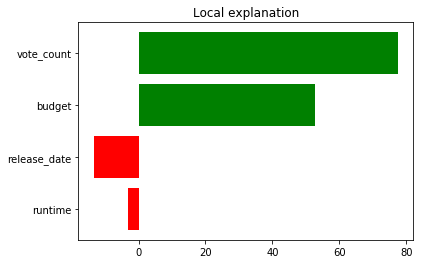

In [98]:
exp.as_pyplot_figure();

Интерпретация: Цвет и знак показывают направление и степень влияния конкретной переменной на результат. Т.е. в данном примере число голосов и бюджет способствуют увеличению прибыли, а дата выхода и длительность наоборот